In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
f= "../data/processed/df_concatenado.parquet"
tmx= pd.read_parquet(f)

## 3. Análisis de Datos Faltantes

Antes de limpiar, evaluamos la cantidad y distribución de valores faltantes (NaN)

In [3]:
print(tmx.isnull().sum())
print("\nPorcentaje de NaNs por columna:")
print((tmx.isnull().sum() / len(tmx)) * 100)

RECORD              0
Batt_Volt_Min       0
I_glo_Avg         397
I_dir_Avg          10
I_dif_Avg        1331
AirTC_Avg           0
AirTC_Max           0
AirTC_Min           0
AirTC_Std           0
RH_Avg              0
RH_Max              0
RH_Min              0
RH_Std              0
WS_ms_Avg           0
WS_ms_Max           0
WS_ms_Min           0
WS_ms_Std           0
WindDir           578
CS106_PB_Avg        0
Rain_mm_Tot         0
dtype: int64

Porcentaje de NaNs por columna:
RECORD           0.000000
Batt_Volt_Min    0.000000
I_glo_Avg        0.861732
I_dir_Avg        0.021706
I_dif_Avg        2.889082
AirTC_Avg        0.000000
AirTC_Max        0.000000
AirTC_Min        0.000000
AirTC_Std        0.000000
RH_Avg           0.000000
RH_Max           0.000000
RH_Min           0.000000
RH_Std           0.000000
WS_ms_Avg        0.000000
WS_ms_Max        0.000000
WS_ms_Min        0.000000
WS_ms_Std        0.000000
WindDir          1.254613
CS106_PB_Avg     0.000000
Rain_mm_Tot      0.0

<Axes: >

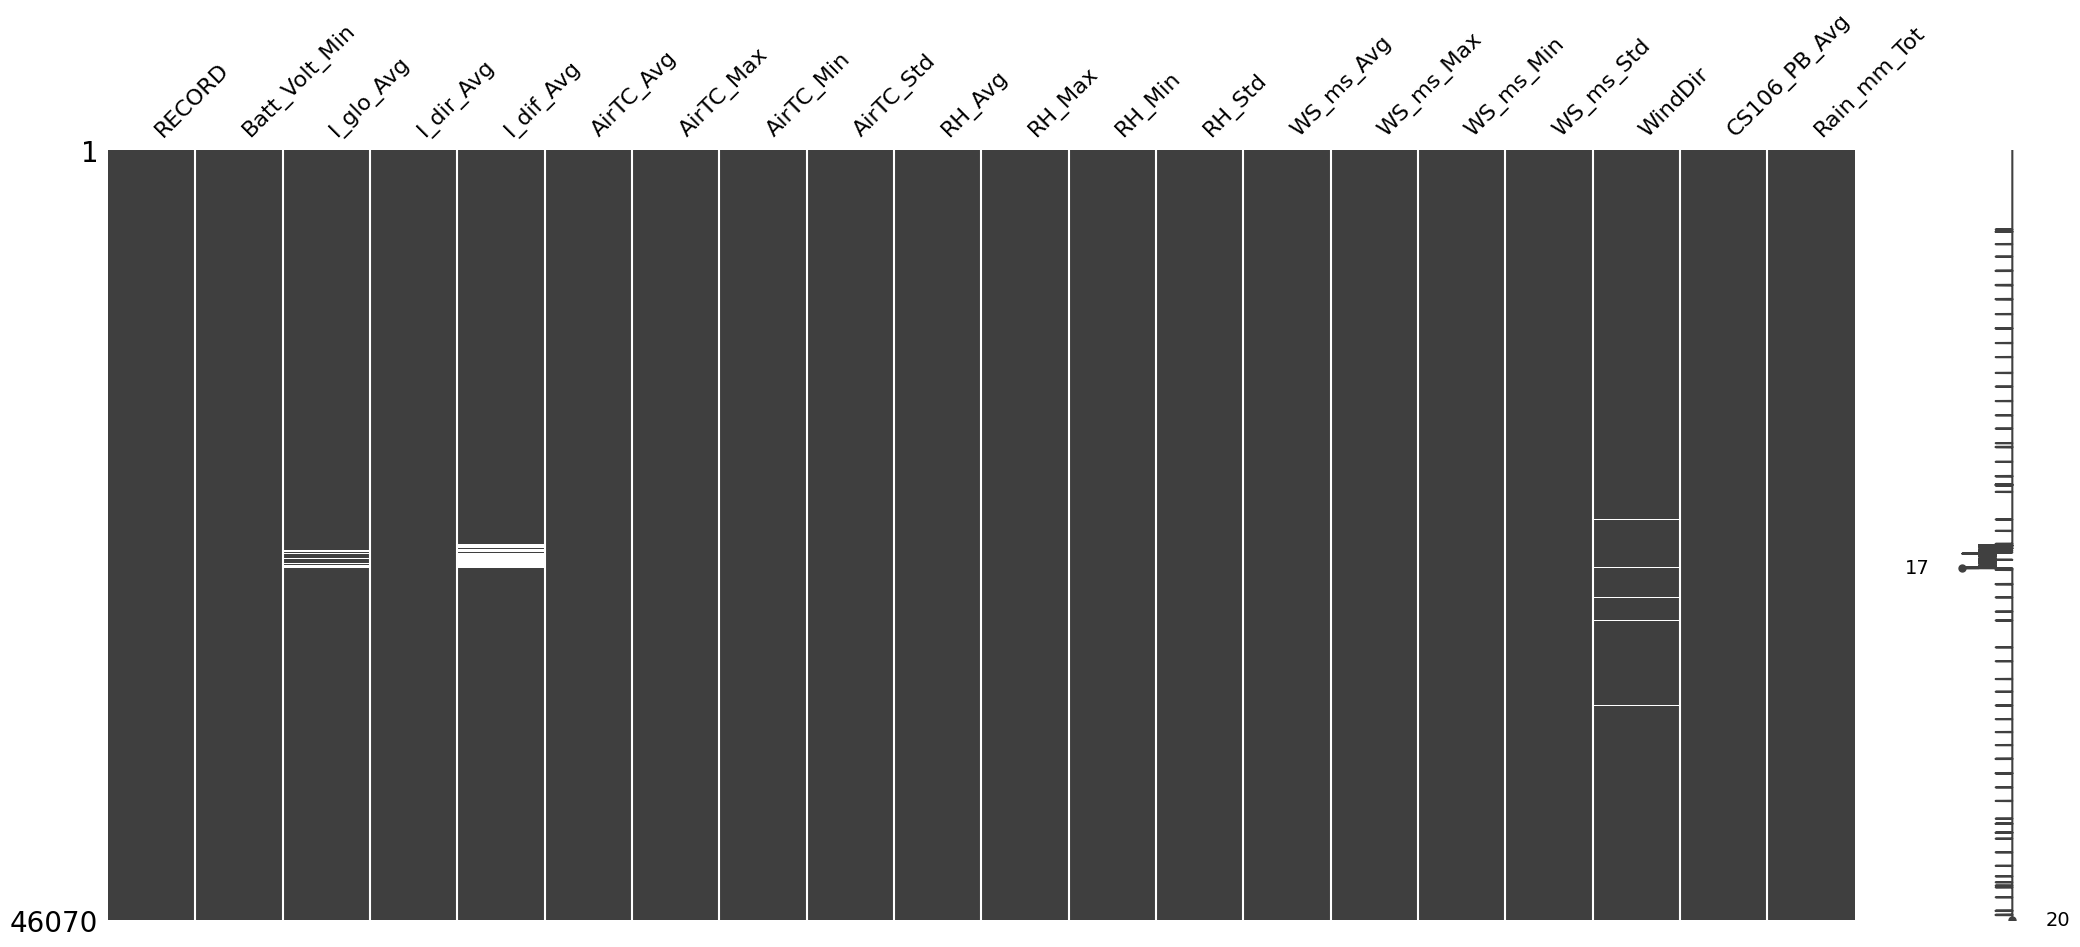

In [4]:
msno.matrix(tmx)

## 4. Limpieza de Datos

Estrategia aplicada:
1. Eliminar filas donde todos los valores son NaN (periodos sin datos)
2. Interpolar gaps pequeños (≤6 registros = 1 hora) usando interpolación temporal
3. Mantener NaNs en gaps largos (indican fallas reales del sensor)

A lo que inestigué la interpolación temporal respeta la naturaleza física de las variables meteorológicas

In [5]:
tmx_clean = tmx.dropna(how='all')
tmx_clean = tmx_clean.interpolate(method='time', limit=6)

print(f"\nNaNs restantes por columna:")
print(tmx_clean.isnull().sum())


NaNs restantes por columna:
RECORD              0
Batt_Volt_Min       0
I_glo_Avg         199
I_dir_Avg           0
I_dif_Avg        1242
AirTC_Avg           0
AirTC_Max           0
AirTC_Min           0
AirTC_Std           0
RH_Avg              0
RH_Max              0
RH_Min              0
RH_Std              0
WS_ms_Avg           0
WS_ms_Max           0
WS_ms_Min           0
WS_ms_Std           0
WindDir           217
CS106_PB_Avg        0
Rain_mm_Tot         0
dtype: int64


### Se logró reducir el numero de Nans en las columnas problematicas

In [6]:
tmx_clean.to_parquet("../data/processed/datos_limpios.parquet")

## Resumen del Proceso

- ✓ Codificación de caracteres especiales
- ✓ Formato de comillas en archivo fuente
- ✓ Conversión de timestamps
- ✓ Interpolación de gaps pequeños
- ✓ Eliminación de registros completamente vacíos